313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
[[-7.01672118e-03  7.55937863e-03  4.18748619e-04 -6.64330199e-02
   2.91473046e-02  4.68302853e-02 -5.53307217e-03 -2.13448144e-02
   1.39241843e-02  8.28563571e-01]
 [ 9.53378022e-01  1.33085568e-02  7.70835727e-02 -6.65458590e-02
   1.20318681e-02 -2.94851642e-02  1.43704275e-02 -1.76186189e-02
  -7.65097886e-02  3.01709841e-03]
 [ 3.18876505e-02  1.94879957e-02  8.42757404e-01  2.44100299e-02
   2.85812337e-02  7.10219052e-03  3.94441411e-02 -2.18829419e-02
   1.27547026e-01  3.39153106e-03]
 [ 3.55806239e-02  2.57176496e-02 -4.16190363e-03  2.96498299e-01
  -1.51574388e-02  7.95266688e-01  5.98694617e-03 -6.94336146e-02
   8.61046538e-02  3.05693634e-02]
 [ 6.53770100e-03  9.71789479e-01  1.23229926e-03  9.55358706e-03
   1.19922985e-03  2.31822301e-02 -1.18724024e-02 -5.96555956e-02
  -5.93704209e-02 -2.27970462e-02]
 [ 1.05240906e-03 -3.34931538e-02  1.71482395e-02  4.17300081e-03
  -1.03734761e-01 -1.28321145e-02  4.90069902e-03 -2.688

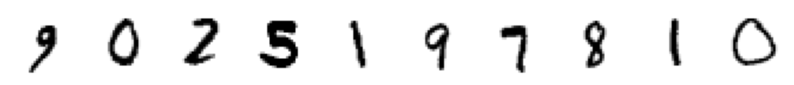

In [2]:
# 12_MNIST_LOAD_MODEL.py

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST dataset으로부터 데이터 읽기
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_copy = np.copy(x_test[1000:1010])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp_model = tf.keras.models.load_model("202016026_권지민_MNIST.keras")

rlt = mlp_model.predict(x_test)
print(rlt[1000:1010])
print("정답은 : ", np.argmax(rlt[1000:1010],axis = 1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()




#res = mlp_model.evaluate(x_test, y_test, verbose=0)
#print("정확율 = ",res[1]*100)



Epoch 1/30


/Users/test/Documents/kjm996/2024-2학기/AI-머신러닝/idk-tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 2s - 5ms/step - accuracy: 0.8799 - loss: 0.0332 - val_accuracy: 0.9400 - val_loss: 0.0158
Epoch 2/30
469/469 - 2s - 5ms/step - accuracy: 0.9529 - loss: 0.0128 - val_accuracy: 0.9609 - val_loss: 0.0108
Epoch 3/30
469/469 - 2s - 5ms/step - accuracy: 0.9662 - loss: 0.0100 - val_accuracy: 0.9665 - val_loss: 0.0095
Epoch 4/30
469/469 - 3s - 6ms/step - accuracy: 0.9729 - loss: 0.0085 - val_accuracy: 0.9672 - val_loss: 0.0084
Epoch 5/30
469/469 - 3s - 6ms/step - accuracy: 0.9766 - loss: 0.0075 - val_accuracy: 0.9714 - val_loss: 0.0083
Epoch 6/30
469/469 - 3s - 7ms/step - accuracy: 0.9801 - loss: 0.0067 - val_accuracy: 0.9755 - val_loss: 0.0075
Epoch 7/30
469/469 - 3s - 6ms/step - accuracy: 0.9823 - loss: 0.0060 - val_accuracy: 0.9750 - val_loss: 0.0070
Epoch 8/30
469/469 - 3s - 7ms/step - accuracy: 0.9851 - loss: 0.0054 - val_accuracy: 0.9766 - val_loss: 0.0064
Epoch 9/30
469/469 - 3s - 7ms/step - accuracy: 0.9870 - loss: 0.0048 - val_accuracy: 0.9782 - val_loss: 0.0060
Epoch 10/30


/var/folders/gw/lpn0537x0gs0p60h005j12yc0000gn/T/ipykernel_57131/3351692015.py:59: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'validontion', loc ='upper left')


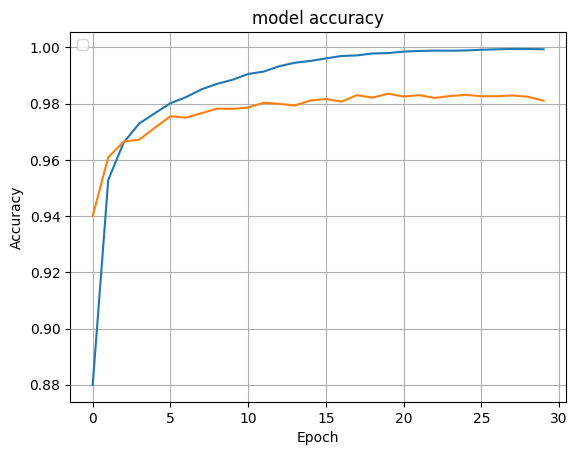

In [3]:
# 13_MNIST_LEARN_two_MODEL.py

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST dataset으로부터 데이터 읽기
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_copy = np.copy(x_test[1000:1010])

x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_output=10

mlp = Sequential()

mlp.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,),kernel_initializer='random_uniform', 
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden2, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

hist = mlp.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test,verbose=0)
print("정확율 = ",res[1]*100)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend('Train', 'validontion', loc ='upper left')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 4s - 9ms/step - accuracy: 0.8093 - loss: 0.0351 - val_accuracy: 0.8434 - val_loss: 0.0268
Epoch 2/30
469/469 - 4s - 8ms/step - accuracy: 0.8565 - loss: 0.0235 - val_accuracy: 0.8524 - val_loss: 0.0236
Epoch 3/30
469/469 - 4s - 9ms/step - accuracy: 0.8673 - loss: 0.0209 - val_accuracy: 0.8578 - val_loss: 0.0221
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.8760 - loss: 0.0195 - val_accuracy: 0.8598 - val_loss: 0.0222
Epoch 5/30
469/469 - 4s - 8ms/step - accuracy: 0.8810 - loss: 0.0186 - val_accuracy: 0.8666 - val_loss: 0.0205
Epoch 6/30
469/469 - 4s - 8ms/step - accuracy: 0.8875 - loss: 0.0179 - val_accuracy: 0.8641 - val_loss: 0.0209
Epoch 7/30
469/469 - 4s - 8ms/step - accuracy: 0.8914 - loss: 0.0173 - val_accuracy: 0.8711 - val_loss: 0.0201
Epoch 8/30
469/469 - 4s - 8ms/step - accuracy: 0.8939 - loss: 0.0169 - val_accuracy: 0.8720 - val_loss: 0.0195
Epoch 9/30
469/469 - 4s - 8ms/step - accuracy: 0.8980 - loss: 0.0161 - val_accuracy: 0.8711 - val_loss: 0.0197
E

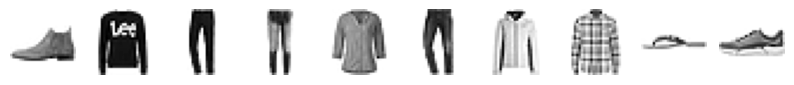

/var/folders/gw/lpn0537x0gs0p60h005j12yc0000gn/T/ipykernel_57131/1415021350.py:93: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'validontion', loc ='upper left')


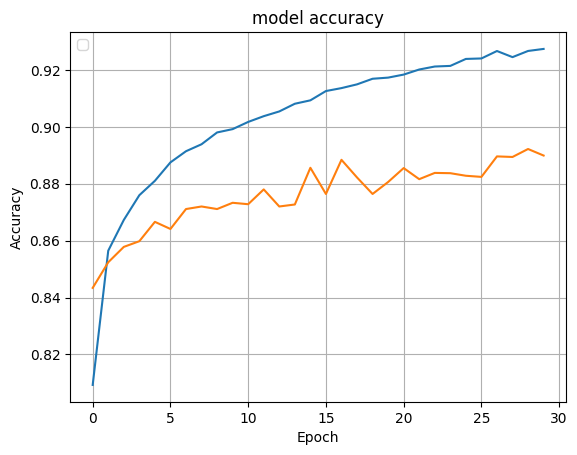

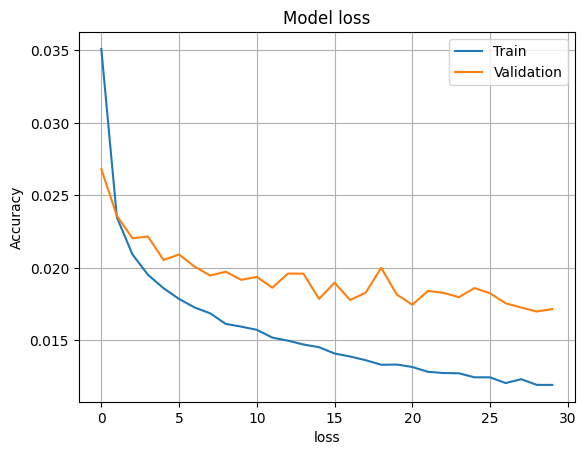

In [4]:
# 14_MNIST_FASHION_one_layer

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt 


# MNIST dataset으로부터 데이터 읽기
# (x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])

# 3D --> 2D  reshaping
x_train = x_train.reshape(60000,784)  
x_test = x_test.reshape(10000,784)

# nomarlization
x_train = x_train.astype(np.float32)/255.0 
x_test = x_test.astype(np.float32)/255.0

# to one-hot enc
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp = Sequential()

mlp.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,),kernel_initializer='random_uniform', 
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden2, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden3, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden4, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_output, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

hist = mlp.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test,verbose=0)
print("정확율 = ",res[1]*100)


# mlp.save("202016026_권지민_FASHION_4_model.keras")


rlt = mlp.predict(x_test)
print(rlt[:10])
print("정답은 : ", np.argmax(rlt[:10], axis=1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()


# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend('Train', 'validontion', loc ='upper left')
plt.grid()
plt.show()
      
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()